# Interactive pulsar beam geometry

This is an interactive static page to learn how to use IPythons excellent
interactive tools. Thanks to [JakeVDP](https://jakevdp.github.io/blog/2013/12/05/static-interactive-widgets/)
for the demonstration on how to do this.

## Pulsar beam geometry

This plot the beam-geometry and slices thorugh the beam which correspond to an observer 
seeing a single "pulse". The basic idea is that the intensity has a function

$$ I \sim \exp\left[ -\frac{y^2}{2(\lambda\rho_2^0)^2} - -\frac{x^2}{2(\rho_2^0 + \rho_2'' y^2)^2}\right] $$

which is a 2D-Gaussian with some modification to allow for a non-Gaussian beam. The free parameters are the scale factor $\lambda$ in the longitudinal variance, and the $\rho_2''$.

In [17]:
plt.rcParams['figure.max_open_warning'] = -1
plt.rcParams['font.size'] = 18
import seaborn as sns

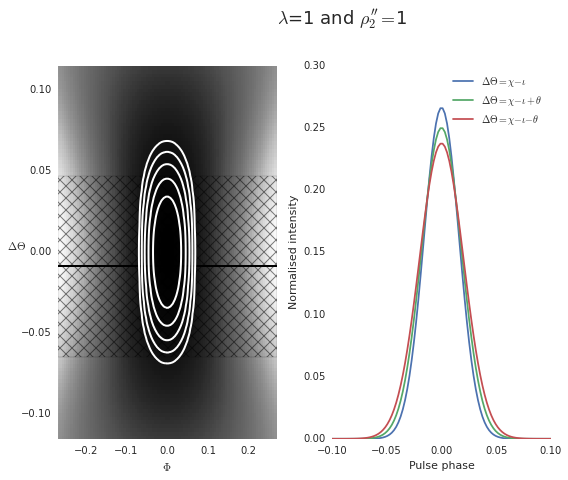

In [52]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Define functions of the intensity
def I(x, y, rho1, rho2, rho2d, rho2dd):
    return np.exp(-y**2/(2*rho1**2) - x**2/(2*(rho2 + rho2d*y + rho2dd*y**2)**2))


def x_at_y0(f, rho2):
    """ The x value as y=0 """
    return rho2 * np.sqrt(2*np.log(1/f))


def y_at_x0(f, rho1):
    """ The y value as y=0 """
    return rho1 * np.sqrt(2*np.log(1/f))

def rescale(y):
    return y/np.sqrt(np.sum(y**2))
    

def plot(factor, rho2dd):
    rho2 = 0.016
    rho2d = 0
    theta = 0.056
    chi = 1.554
    iota = np.arccos(0.008)
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6))
    
    # Set up limits
    rho1 = factor*rho2
    smallest_contour_lines = 1e-5
    levels = np.logspace(-1, -4, 5)
    
    xmax = 3.5*x_at_y0(smallest_contour_lines, rho2)
    x = np.linspace(-xmax, xmax, 100)
    ymax = 1.5*y_at_x0(smallest_contour_lines, rho1)
    y = np.linspace(-ymax, ymax, 100)

    X, Y = np.meshgrid(x, y)
    Z = I(X, Y, rho1, rho2, rho2d, rho2dd)

    ax1.pcolormesh(X, Y, np.log10(Z), cmap=plt.cm.Greys,
                   zorder=-10)
    CS = ax1.contour(X, Y, Z, colors="w", levels=levels, linewidths=2, zorder=10)
    
    # Add the observer position
    ax1.axhline(chi - iota, color="k", lw=2)
    ax1.fill_between(x, (chi-iota) - theta, (chi-iota) + theta, 
                     color="none", hatch="//\\\\", edgecolor="k", alpha=0.5)
    ax1.set_xlabel("$\Phi$")
    ax1.set_ylabel("$\Delta\Theta$", rotation="horizontal")
    plt.tight_layout()
    
    
    # Add the line-plot 
    x = np.linspace(-0.1, 0.1, 100)
    pulse_at_ave = rescale(I(x, chi-iota, rho1, rho2, rho2d, rho2dd))
    pulse_at_p = rescale(I(x, chi-iota+theta, rho1, rho2, rho2d, rho2dd))
    pulse_at_m = rescale(I(x, chi-iota-theta, rho1, rho2, rho2d, rho2dd))

    ax2.plot(x, pulse_at_ave, label=r"$\Delta\Theta=\chi-\iota$")
    ax2.plot(x, pulse_at_p, label=r"$\Delta\Theta=\chi-\iota+\theta$")
    ax2.plot(x, pulse_at_m,  label=r"$\Delta\Theta=\chi-\iota-\theta$")
    ax2.set_xlim(-0.1, 0.1)
    ax2.legend(loc=1, frameon=False, fontsize=10)
    ax2.set_ylabel("Normalised intensity")
    ax2.set_xlabel("Pulse phase")
    plt.tight_layout()
   
    fig.suptitle(r"$\lambda$={} and $\rho_2''=${}".format(factor, rho2dd), 
                 fontsize=18, y=1.1, x=0.6)
    return fig

plot(1, 1)
plt.show()

In [53]:
from ipywidgets import StaticInteract, RangeWidget, RadioWidget

StaticInteract(plot, 
               factor=RangeWidget(0.5, 2.0, 0.25, default=1), 
               rho2dd=RangeWidget(0, 8, 1, default=4)
               )